In [109]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [110]:
# ladowanie danych
X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

IMG_SIZE = X_test.shape[1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((656, 100, 100, 3), (656, 3), (164, 100, 100, 3), (164, 3))

In [111]:
model = tf.keras.models.Sequential([
    #Conv2D(filters=16, kernel_size=(3,3), activation='relu', #warstwa splotu, dla 3d byloby dla filmow, w filters dajemy potegi dwojki
           #padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)), #zeby rzedy nie znikaly padding = same
    #MaxPool2D(pool_size=(2,2)), #liczba parametrow rosnie bardzo szybko, dlatego stosujemy warstwy laczace "maxpooling"(bierze kilka sasiednich pixeli i wybiera z nich maksimum i potem to zwraca)
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax') # na wyjsciu liczba klas
])



In [112]:

model.compile(optimizer='sgd',
                loss='categorical_crossentropy', # dlaczego nie dziala 'sparse_categorical_crossentropy'?!!!
                metrics=['accuracy'])

In [113]:
#,tf.keras.callbacks.ModelCheckpoint('model', monitor = "val_loss", mode = 'min', save_best_only=True)

In [114]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/50
21/21 [==============================] - 1s 23ms/step - loss: 1.2220 - accuracy: 0.3704 - val_loss: 1.0712 - val_accuracy: 0.3415
Epoch 2/50
21/21 [==============================] - 0s 13ms/step - loss: 1.0408 - accuracy: 0.3811 - val_loss: 1.0023 - val_accuracy: 0.4756
Epoch 3/50
21/21 [==============================] - 0s 10ms/step - loss: 0.9703 - accuracy: 0.4771 - val_loss: 0.9309 - val_accuracy: 0.4817
Epoch 4/50
21/21 [==============================] - 0s 13ms/step - loss: 0.9000 - accuracy: 0.5625 - val_loss: 0.8591 - val_accuracy: 0.7439
Epoch 5/50
21/21 [==============================] - 0s 12ms/step - loss: 0.7877 - accuracy: 0.7149 - val_loss: 0.7758 - val_accuracy: 0.7927
Epoch 6/50
21/21 [==============================] - 0s 11ms/step - loss: 0.6784 - accuracy: 0.7881 - val_loss: 0.6379 - val_accuracy: 0.7805
Epoch 7/50
21/21 [==============================] - 0s 14ms/step - loss: 0.5840 - accuracy: 0.8247 - val_loss: 0.6712 - val_accuracy: 0.6951
Epoch 8/50
21

In [115]:
# save model to h5 format

# model.save('best_model.h5')


In [116]:
#from tensorflow.keras.models import load_model
#nnetwork = load_model('best_model.h5')

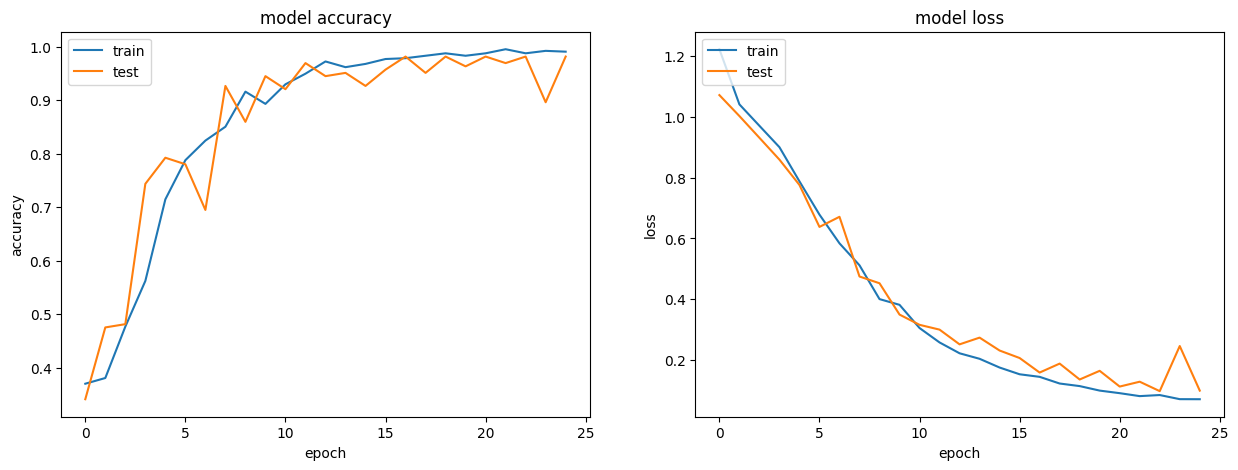

In [117]:
ax, fig = plt.subplots(1, 2, figsize=(15, 5))
fig[0].plot(history.history['accuracy'])
fig[0].plot(history.history['val_accuracy'])
fig[0].set_title('model accuracy')
fig[0].set_ylabel('accuracy')
fig[0].set_xlabel('epoch')
fig[0].legend(['train', 'test'], loc='upper left')
fig[1].plot(history.history['loss'])
fig[1].plot(history.history['val_loss'])
fig[1].set_title('model loss')
fig[1].set_ylabel('loss')
fig[1].set_xlabel('epoch')
fig[1].legend(['train', 'test'], loc='upper left')
plt.show()
# to nie jest caly proces uczenia komorka train byla uruchamiana kilka razy



In [118]:
y_test.shape

(164, 3)

6/6 [==============================] - 0s 5ms/step


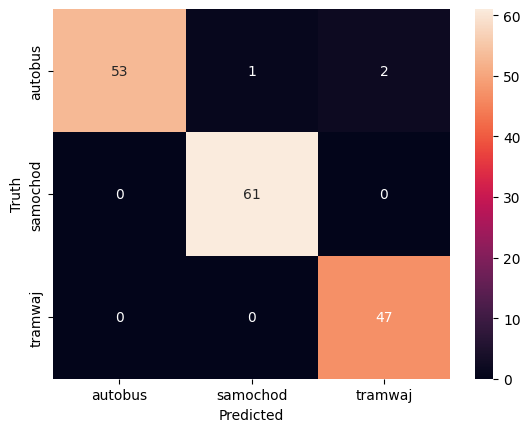

In [119]:
# macierz predykcji
readable_values = ['autobus', 'samochod', 'tramwaj']
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # to zwraca indeks najwiekszej wartosci w kazdym wierszu

new_y_pred = [readable_values[i] for i in y_pred]
new_y_test = [readable_values[i] for i in np.argmax(y_test, axis=1)]
cm = confusion_matrix(new_y_test, new_y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=readable_values, yticklabels=readable_values)

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()





6/6 [==============================] - 0s 3ms/step


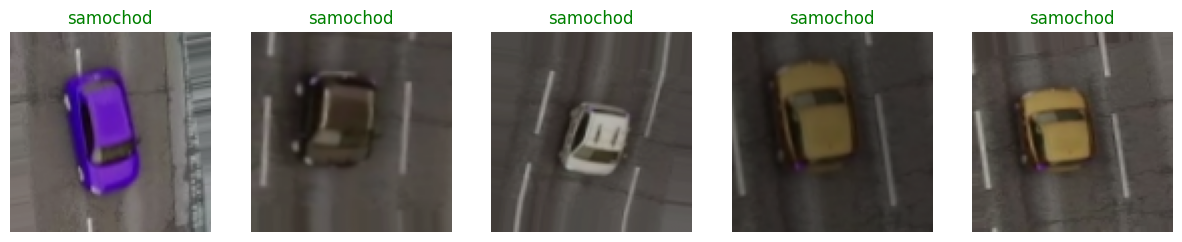

In [120]:
#testowanie
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
y_pred = model.predict(X_test)
for i in range(5):
    num = np.random.randint(0, len(X_test))
    axes[i].imshow(X_test[num])
    pred = np.argmax(y_pred[num])
    true = np.argmax(y_test[num])
    
    if pred != true:
        axes[i].set_title(f'{readable_values[pred]}',  color='red')
    else:
        axes[i].set_title(f'{readable_values[pred]}',  color='green')
    axes[i].axis('off')

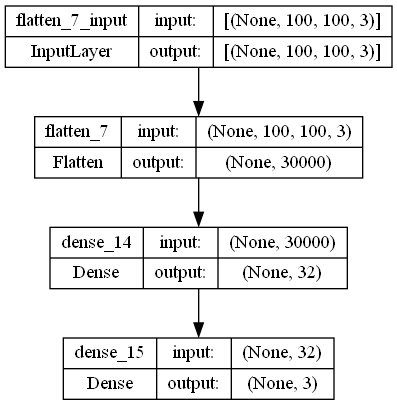

In [124]:
tf.keras.utils.plot_model(model, show_shapes=True,to_file='gqData.png')

In [122]:
#model.save('model1.h5')